<a href="https://colab.research.google.com/github/darthfelipe21/LangGraph/blob/main/LangGraphMultiAgentsStock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

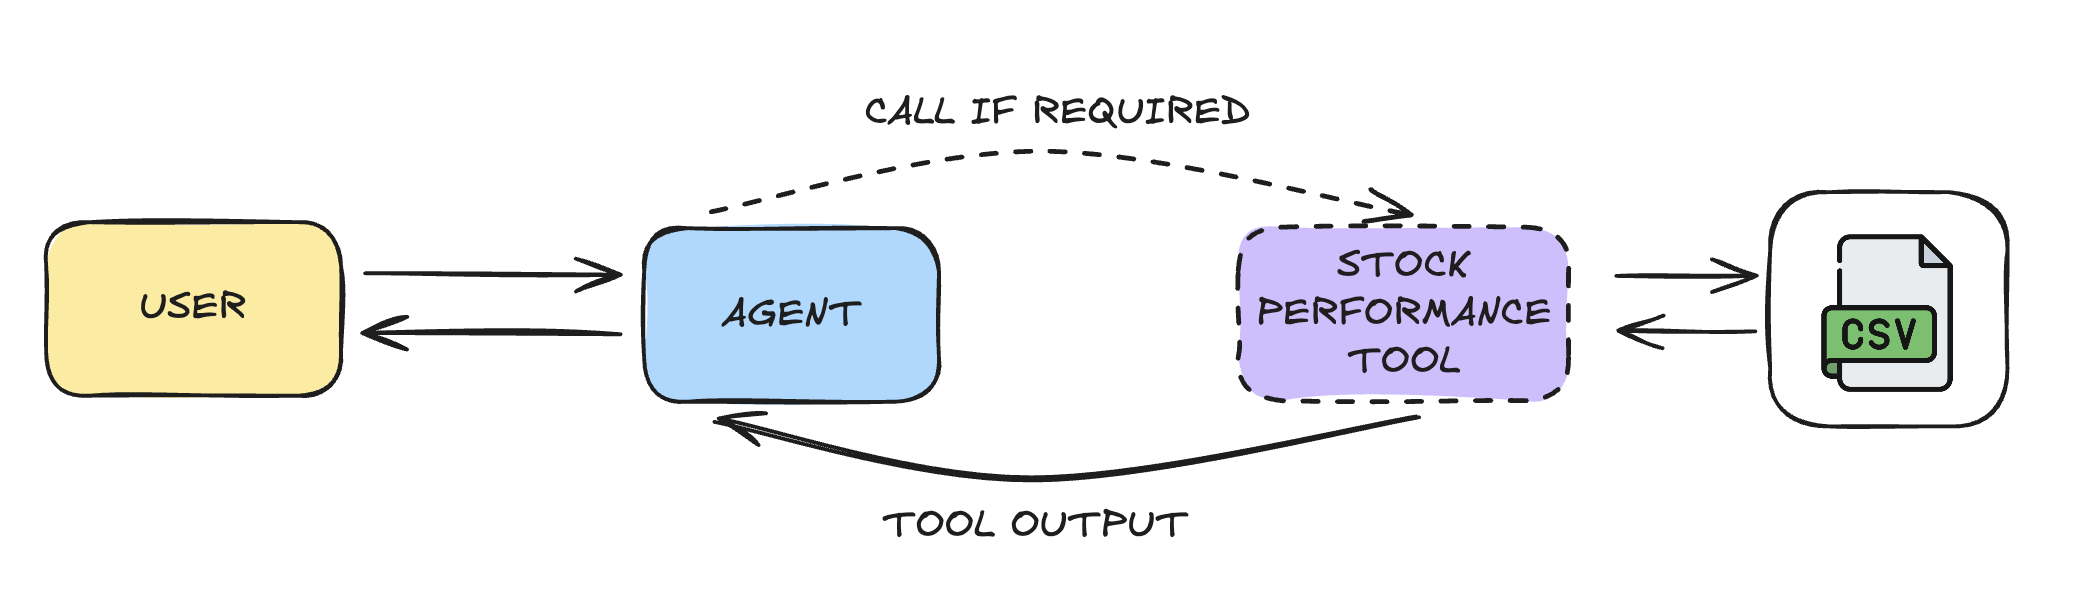

### 📈 Tool 2: Stock performance data

You'll create a tool to load stock performance data from a local CSV file, filter it depending on the user's query, then return the results.

This tool will use stock _ticker symbols_, which are unique company IDs, to return the relevant information for that company. Here are the companies and symbols that have stock data available in your environment:

| Company Name | Ticker Symbol |
|--------------|---------------|
| Apple        | AAPL          |
| Microsoft    | MSFT          |
| Amazon       | AMZN          |
| Meta         | META          |
| Netflix      | NFLX          |
| Tesla        | TSLA          |

Note that this data isn't up-to-date, but you could adapt this to pull real-time data from an API like Yahoo Finance, rather than the CSVs. Try this out after completing the course!

In [ ]:
!pip install --quiet langchain-core==0.3.59

In [ ]:
import os
from typing import Annotated
import pandas as pd
from langchain_core.tools import tool

@tool
def stock_data_tool(
    company_ticker: Annotated[str, "The ticker symbol of the company to retrieve their stock performance data."],
    num_days: Annotated[int, "The number of days of stock data required to respond to the user query."]
) -> str:
    """
    Use this to look-up stock performance data for companies to retrieve a table from a CSV. You may need to convert company names into ticker symbols to call this function, e.g, Apple Inc. -> AAPL, and you may need to convert weeks, months, and years, into days.
    """

    # Load the CSV for the company requested
    file_path = f"data/{company_ticker}.csv"

    if os.path.exists(file_path) is False:
        return f"Sorry, but data for company {company_ticker} is not available. Please try Apple, Amazon, Meta, Microsoft, Netflix, or Tesla."

    stock_df = pd.read_csv(file_path, index_col='Date', parse_dates=True)

    # Ensure the index is in date format
    stock_df.index = stock_df.index.date

    # Maximum num_days supported by the dataset
    max_num_days = (stock_df.index.max() - stock_df.index.min()).days

    if num_days > max_num_days:
        return "Sorry, but this time period exceeds the data available. Please reduce it to continue."

    # Get the most recent date in the DataFrame
    final_date = stock_df.index.max()

    # Filter the DataFrame to get the last num_days of stock data
    filtered_df = stock_df[stock_df.index > (final_date - pd.Timedelta(days=num_days))]

    return f"Successfully executed the stock performance data retrieval tool to retrieve the last *{num_days} days* of data for company **{company_ticker}**:\n\n{filtered_df.to_markdown()}"

Because there's two inputs to this tool, we'll need to pass a dictionary of inputs to `.invoke()` instead of a string.


Invoke your wikipedia_tool() on the company_name variable.

In [ ]:
retrieved_data = stock_data_tool.invoke({"company_ticker": "META", "num_days": 4})
print(retrieved_data)

Because the table is in Markdown format, we can render it using the `display()` and `Markdown()` functions from `IPython.display`. This makes it possible to automate generating nicely formatted reports!

In [ ]:
from IPython.display import display, Markdown
display(Markdown(retrieved_data))